In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
import scipy.stats
import matplotlib.ticker as ticker
from matplotlib import gridspec


1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

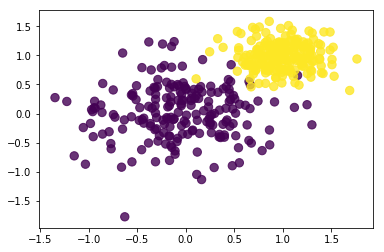

In [2]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

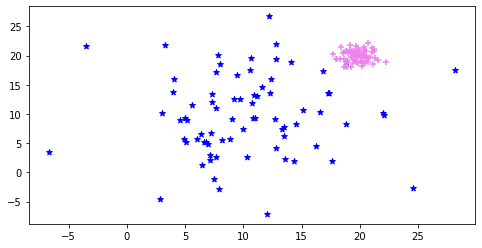

In [2]:
random = np.arange(75)
#ho fatto due np array
ds1 = np.random.normal(10, 6, size=(random.size, 2)) #this gaussian has mean=10 and stdev=6
ds2 = np.random.normal(20, 1, size=(random.size, 2)) #this gaussian has mean=20 and stdev=1

#ho trasformato in dataframe
df1 = pd.DataFrame(ds1, columns = ['x1', 'y1'])
df2 = pd.DataFrame(ds2, columns = ['x2','y2'])

#creating the plot
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.scatter(x=df1['x1'], y=df1['y1'], marker = '*', c = 'blue')
ax1.scatter(x=df2['x2'], y=df2['y2'], marker = '+', c = 'violet')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features) OK
* Convert the content to a Pandas Dataframe OK
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2 OK
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. OK

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable OK
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance" OK
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance" OK
* Plot the profile plot on top of the scatter plot OK

The pickle file is :
 {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}

 This is my clean dataframe:
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]
 
 The array with bin centers: 
 [ 0.20408163  0.6122449   1.02040816  1.42857143  1.83673469  2.24489796
  2.65306122  3.06122449  3.46938776  3.87755102  4.28571429  4.69387755
  5.10204082  5.51020408  5.91836735  6.32653061  6.73469388  7.14285714
  7.55102041  7.95918367  8.36734694  8.7755102   9.18367347  9.59183673
 10.         10.40816327 10.81632653 11.2244898  11.63265306 12.04081633
 12.4489795

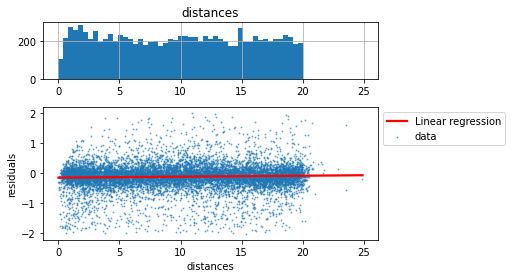

In [5]:
#1) Produce a profile plot from a scatter plot

#setting figure and subfigure
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 7])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0)

#downloading the file (only once then I can comment this line to avoid downloading the file several times)
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /

filename = 'residuals_261.pkl'

#opening the pickle file
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()
#printing  pickle file
print("The pickle file is :\n",new_dict)

#converting the pickle in dictionary
dictionary = dict(new_dict.item())


#converting dictionary to dataframe
res_pd = pd.DataFrame(dictionary)
res_pd

#selecting only entries with |residuals|<2 
res_pd = res_pd[abs(res_pd['residuals'])<2.]
#res_clean2 = res_clean[res_clean['residuals']>-2]
print("\n This is my clean dataframe:\n",res_pd) 

#plotting data and linear regression with seaborn
sns.regplot(x="distances", y="residuals", data= res_clean2, y_jitter=0.1, x_jitter=0.1, line_kws = {'color':'red'}, scatter_kws={'alpha':0.5, 's' : 1}, ax = ax1)


#-------------------------------

#2) Creating the profile histogram without seaborn

#choosing binning
binx = np.linspace(0,20,50)

# creating the array of binning centers 
x = (binx[1:] + binx[:-1])/2
print(" \n The array with bin centers: \n", x)

#creating manually the profile plot for distances and placing above the seaborn scatter plot
histo = res_pd.hist('distances', bins = binx, ax=ax0)
plt.legend(labels=["Linear regression","data"], bbox_to_anchor=(1, 1))

#creating a new column of my dataframe -> from this I can get the mean and the error of residuals
res_pd['bin'] = np.digitize(res_pd['distances'], bins = binx)

#creating the array of residuals' means
y = res_pd.groupby('bin')['residuals'].mean()
print("\n The array of residuals:' means \n", y)

#creating the array of residuals' errors
erry = res_pd.groupby('bin')['residuals'].std()
print("\n The array with residuals' errors: \n", erry)




3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins OK
   * set a proper y axis label OK
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty) OK 
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


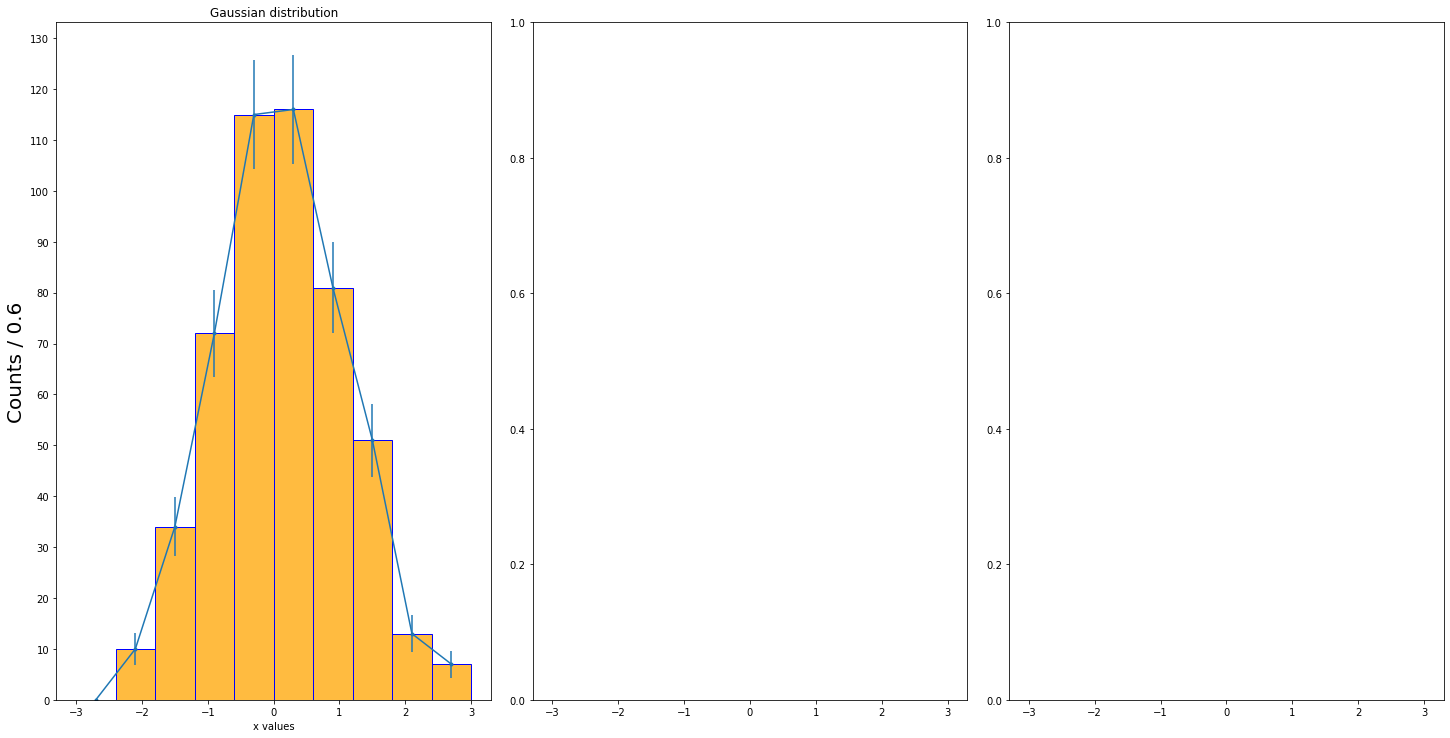

NameError: name 'gauss_mat' is not defined

In [17]:
#creating a numpy array x of lenght N 
x = np.random.normal(0,1,500)
#mean = 0, stdev = 1

#setting figure
fig, ax = plt.subplots(nrows=1, ncols=3, sharex="row", figsize=(20,10))

#creating the histogram
h, limits = np.histogram(x, bins= 10 , range=(-3, +3))
xgrid = np.linspace(-3, 3, 500)

fig.tight_layout()

#setting titles and binning 
ax[0].set_title('Gaussian distribution')
ax[0].set_xlabel('x values')
width = limits[1] - limits[0]
bin_centers = 0.5*(limits[1:] + limits[:-1])
ax[0].set_ylabel(f'Counts / {width:.1f}', size = 20)

#setting y ticks
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(10))

#plotting the histogram
sns.histplot(x=limits[:-1],weights=h,bins=limits,color='orange',edgecolor="blue",ax=ax[0])

#creatinf Poissons errors and plotting them
err = np.sqrt(h)
ax[0].errorbar(
    bin_centers,
    h,
    yerr = err,
    marker = '.',
    #drawstyle = 'steps-mid-'
)
plt.show()



